In [48]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline 
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact,pdp_interact_plot
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap
%config IPCompleter.greedy=True

In [2]:
# size for web display later
plt.rcParams['figure.dpi'] = 72

In [3]:
# df = pd.read_csv('vehicles.csv')
# df.head()

In [4]:
# df1 = df.drop(columns = ['description', 'url', 'region_url'] )

In [5]:
# df1.shape

In [6]:
# df1.isnull().sum()

In [7]:
# df1.to_csv('vehicles_trimmed.csv')

In [8]:
df1 = pd.read_csv('vehicles_trimmed.csv')
df1

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,...,vin,drive,size,type,paint_color,image_url,county,state,lat,long
0,0,7034441763,salt lake city,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,...,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,NaN,ut,40.7372,-111.858
1,1,7034440610,salt lake city,0,2016.0,ford,f-150,excellent,NaN,gas,...,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,NaN,ut,40.5881,-111.884
2,2,7034440588,salt lake city,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,...,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,NaN,ut,40.5881,-111.884
3,3,7034440546,salt lake city,0,2016.0,ford,f-150,excellent,NaN,gas,...,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,NaN,ut,40.5881,-111.884
4,4,7034406932,salt lake city,49999,2018.0,ford,f-450,NaN,NaN,diesel,...,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,NaN,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509572,509572,7034554007,salt lake city,15476,2012.0,nissan,xterra,NaN,6 cylinders,gas,...,5N1AN0NW0CC520698,4wd,NaN,SUV,NaN,https://images.craigslist.org/00z0z_3ERBmVoD5s...,NaN,ut,39.6405,-104.961
509573,509573,7034538385,salt lake city,9881,2008.0,bmw,3 series 328i,NaN,6 cylinders,gas,...,WBAWR33558P150498,rwd,NaN,convertible,NaN,https://images.craigslist.org/01313_38rMiNAW18...,NaN,ut,39.6405,-104.961
509574,509574,7034523643,salt lake city,24895,2019.0,jeep,cherokee,NaN,4 cylinders,gas,...,1C4PJMLB0KD267506,4wd,NaN,SUV,white,https://images.craigslist.org/00606_dOtGS5RmTi...,NaN,ut,45.1637,-113.894
509575,509575,7034458858,salt lake city,32500,2017.0,NaN,Porsche Macan GTS,excellent,6 cylinders,gas,...,NaN,NaN,NaN,NaN,red,https://images.craigslist.org/00s0s_32yAwr0KMt...,NaN,ut,41.3112,-111.969


Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [x] Choose your target. Which column in your tabular dataset will you predict?
- [x] Is your problem regression or classification?
- [x] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [x] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [x] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [x] Begin to clean and explore your data.
- [x] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [9]:
df1.columns

Index(['Unnamed: 0', 'id', 'region', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [10]:
# Choose target
target = 'price'

In [11]:
# Is your problem regression or classification?
# Regression, predicting a continuous variable with many levels

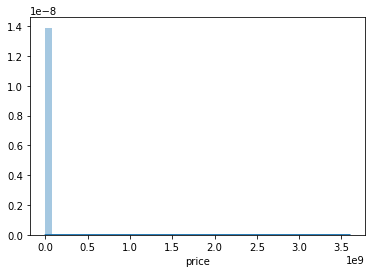

In [12]:
# Target distribution

sns.distplot(df1['price'])

In [13]:
pd.options.display.float_format = '{:.1f}'.format

In [14]:
print(np.median(df1['price']))
y = df1['price']
y.describe()
# Very right skewed but the 0s are holding it back even more. 
# Let's look at logs

9377.0


count       509577.0
mean         54796.8
std        9575025.1
min              0.0
25%           3995.0
50%           9377.0
75%          17955.0
max     3600028900.0
Name: price, dtype: float64

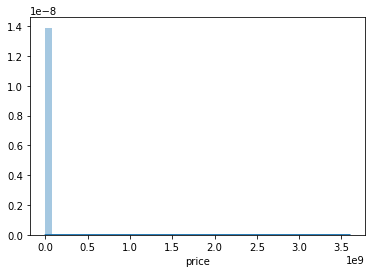

In [15]:
y = y.replace(0, np.NaN)
sns.distplot(y)

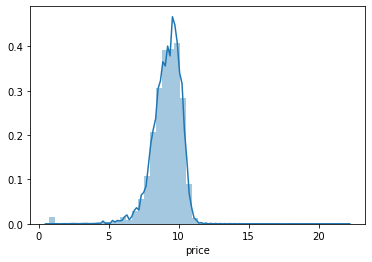

In [16]:
# It was deemed not worth log transforming, I did some modeling below and R^2 was worse
# y_log = np.log1p(y)
# sns.distplot(y_log)

In [17]:
# Chop out some outliers

# Also consider doing the test val train split before this and writing a function for it all
df2 = df1
df2['price'] = df2['price'].replace(0,np.NaN)
df2 = df2.dropna(subset=['price'])
df2 = df2[(df2['price'] >= np.percentile(df2['price'], 0.05)) &
          (df2['price'] <= np.percentile(df2['price'], 99.95))]
df2['price'].describe()

count   465765.0
mean     13606.2
std      11430.8
min          1.0
25%       5000.0
50%      10500.0
75%      18949.0
max     149000.0
Name: price, dtype: float64

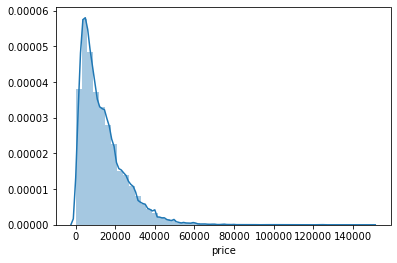

In [66]:
sns.distplot(df2['price'])

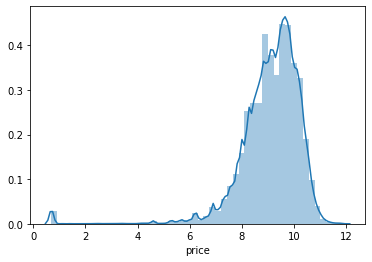

In [18]:
y = np.log1p(df2['price'])
sns.distplot(y)
# Now it's left skewed

In [19]:
y.describe()

count   465765.0
mean         9.1
std          1.2
min          0.7
25%          8.5
50%          9.3
75%          9.8
max         11.9
Name: price, dtype: float64

In [20]:
# Dollar amount of the average
np.e**9.1

8955.292703482504

In [21]:
# Choose your evaluation metric(s).

# R^2, MAE isn't as good with the log transformation

In [22]:
#Choose which observations you will use to train, validate, and test your model.
train_orig, test = train_test_split(df2.drop(columns=['county','Unnamed: 0']) , test_size = 0.1, train_size = 0.9)
test

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,transmission,vin,drive,size,type,paint_color,image_url,state,lat,long
165892,7039859527,lakeland,2800.0,2006.0,nissan,altima,NaN,NaN,gas,nan,...,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00v0v_9qEibN7uZK...,fl,28.3,-81.3
120778,7049816182,SF bay area,18985.0,2015.0,mercedes-benz,c-class,excellent,NaN,gas,32131.0,...,automatic,55SWF4JB9FU091147,rwd,NaN,sedan,grey,https://images.craigslist.org/00i0i_dJ4RiLJBjc...,ca,38.6,-121.3
256552,7043537390,new orleans,11690.0,2012.0,honda,accord,NaN,NaN,gas,63174.0,...,automatic,1HGCS1B72CA013498,NaN,full-size,coupe,silver,https://images.craigslist.org/00e0e_ltg0drdzts...,la,30.0,-90.1
48292,7046092073,wausau,29500.0,2015.0,ram,1500 sport,good,NaN,gas,nan,...,automatic,NaN,4wd,NaN,truck,black,https://images.craigslist.org/00l0l_jP6u2Scm2t...,wi,44.6,-89.5
244868,7045377895,topeka,65925.0,2019.0,dodge,charger,NaN,NaN,gas,318.0,...,automatic,NaN,rwd,NaN,NaN,NaN,https://images.craigslist.org/00S0S_jmC77kcTjd...,ks,39.0,-95.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381086,7043644139,rochester,18567.0,2015.0,toyota,rav4,excellent,4 cylinders,gas,49000.0,...,automatic,2T3DFREV9FW316638,4wd,full-size,SUV,silver,https://images.craigslist.org/00O0O_ex2xkPDh9o...,ny,43.0,-77.7
120077,7049986776,SF bay area,35999.0,2018.0,nissan,nv1500 cargo van,like new,6 cylinders,gas,22300.0,...,automatic,1N6BF0KM4JN,4wd,full-size,van,white,https://images.craigslist.org/00y0y_d8aE1R6D2r...,ca,38.3,-122.3
272130,7043859258,western massachusetts,18300.0,2015.0,mini,countryman cooper s all4,good,NaN,gas,49264.0,...,other,WMWZC5C5XFWM19222,NaN,NaN,hatchback,blue,https://images.craigslist.org/00000_k3hAEOuIBR...,ma,42.1,-72.5
490911,7047343846,el paso,2750.0,2008.0,dodge,caliber sxt,good,4 cylinders,gas,nan,...,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00Z0Z_3NHfiCdllD...,tx,31.6,-106.3


In [23]:
train, val = train_test_split(train_orig, train_size = 0.9, test_size = 0.1)
train

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,transmission,vin,drive,size,type,paint_color,image_url,state,lat,long
499341,7044899774,mcallen / edinburg,11200.0,2017.0,ford,fusion,like new,4 cylinders,gas,30500.0,...,automatic,NaN,fwd,mid-size,sedan,silver,https://images.craigslist.org/00n0n_6GoSJhAT0c...,tx,26.3,-98.6
333035,7048089646,greensboro,7200.0,1988.0,NaN,88 mustang lx 5.o,excellent,NaN,gas,nan,...,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00p0p_5GrbIi3ckx...,nc,36.0,-79.5
464803,7033417344,sioux falls / SE SD,6995.0,2011.0,ford,flex,good,6 cylinders,gas,152000.0,...,automatic,2FMGK5CC6BBD24417,fwd,mid-size,SUV,silver,https://images.craigslist.org/01414_qb0g2hgCS0...,sd,43.5,-96.8
108483,7046608378,reno / tahoe,6495.0,2006.0,bmw,x5 3.0i,excellent,6 cylinders,gas,15200.0,...,automatic,NaN,4wd,mid-size,SUV,custom,https://images.craigslist.org/01414_6pqXn9bu1P...,ca,39.5,-119.8
184682,7039705751,tallahassee,14500.0,2013.0,bmw,5-series 535i,excellent,6 cylinders,gas,93989.0,...,automatic,NaN,rwd,full-size,sedan,black,https://images.craigslist.org/00A0A_eY5zFvH1b1...,fl,30.5,-84.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477998,7040694882,tri-cities,18400.0,2018.0,ford,escape se sport utility 4d,good,NaN,gas,40725.0,...,automatic,1FMCU9GD1JUB28705,4wd,NaN,other,NaN,https://images.craigslist.org/00s0s_kjNzw9mrgp...,tn,33.8,-84.4
129927,7045929297,yuba-sutter,24777.0,2014.0,cadillac,escalade,NaN,NaN,gas,108967.0,...,automatic,1GYS4CEF6ER109636,4wd,NaN,SUV,NaN,https://images.craigslist.org/00v0v_dZ4UJJVoJL...,ca,38.6,-121.4
417935,7044629953,bend,10488.0,1997.0,ford,f250 crew cab,NaN,NaN,gas,210714.0,...,automatic,1FTHW26G4VEA44689,4wd,NaN,truck,NaN,https://images.craigslist.org/00w0w_8eEpbKk9KL...,or,45.5,-122.4
488521,7049499290,dallas / fort worth,30000.0,2015.0,chevrolet,silverado 2500hd,NaN,NaN,diesel,64.0,...,automatic,NaN,4wd,NaN,NaN,NaN,https://images.craigslist.org/01515_2wC8fwb6qr...,tx,33.0,-96.8


In [24]:
#  Begin to clean and explore your data.
# - [x] Begin to choose which features, if any, to exclude. Would some features "leak" future information?
# Question about what to do with price distribution: should I keep closing in the quartiles until the lower hump is left out?
# NaNs? Get rid of them?

In [25]:
# Wrangle ML datasets¶
# x Continue to clean and explore your data.
#  For the evaluation metric you chose, what score would you get just by guessing?
#  Can you make a fast, first model that beats guessing?

In [26]:
len(train['price'])

377269

In [27]:
#  For the evaluation metric you chose, what score would you get just by guessing?
# R^2 for a flat line of the mean would be 0. Let's look at the MAE
list_of_mean = [train['price'].mean()] * len(val['price'])
mean_absolute_error(val['price'], list_of_mean)

8604.421277867888

In [28]:
# Let's do a univariate linear regression as a baseline as well
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(train[['year']])
lr = LinearRegression()
model = lr.fit(imp_mean.transform(train[['year']]),train['price'])

print('MAE:', mean_absolute_error(val['price'], model.predict(imp_mean.transform(val[['year']]))))
print('R^2:', r2_score(val['price'], model.predict(imp_mean.transform(val[['year']]))))
# Alrighty then. Got some baselines!

MAE: 7817.192806741724
R^2: 0.10392768361490412


In [29]:
# Heck let's do a decision tree as a baseline too
target = 'price'
features = ['region', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'vin',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat',
       'long']
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [30]:
# Heck let's do a decision tree as a baseline too
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    DecisionTreeRegressor(max_depth=10)
)
pipeline.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['region', 'manufacturer', 'model',
                                      'condition', 'cylinders', 'fuel',
                                      'title_status', 'transmission', 'vin',
                                      'drive', 'size', 'type', 'paint_color',
                                      'state'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'region',
                                          'data_type': dtype('O'),
                                          'mapping': mcallen / edinbu...
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                   

In [31]:
y_pred = pipeline.predict(X_val)
print('MAE:', mean_absolute_error(y_val, y_pred))
print('R^2:', r2_score(y_val, y_pred))

# Pretty dope tree

MAE: 4041.4673603020656
R^2: 0.6539751756666754


In [32]:
# Permutation & Boosting¶
# You will use your portfolio project dataset for all assignments this sprint.

# Assignment
# Complete these tasks for your project, and document your work.

# x If you haven't completed assignment #1, please do so first.
# x Continue to clean and explore your data. Make exploratory visualizations.
# x Fit a model. Does it beat your baseline?
#  Try xgboost.
#  Get your model's permutation importances.

In [33]:
train.dtypes

id                int64
region           object
price           float64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
vin              object
drive            object
size             object
type             object
paint_color      object
image_url        object
state            object
lat             float64
long            float64
dtype: object

Text(0.5, 1.0, 'price by year')

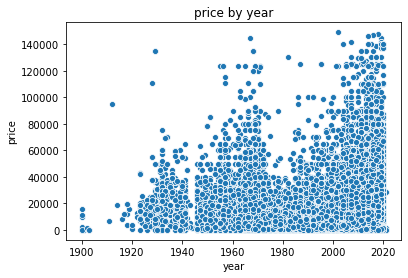

In [34]:
sns.scatterplot(train['year'], train['price'])
plt.title('price by year')

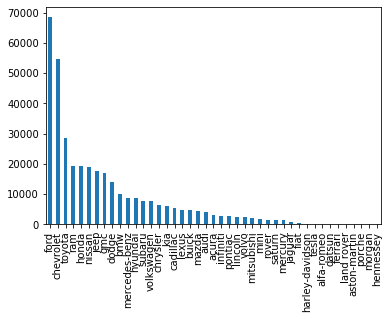

In [35]:
train['manufacturer'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'price by color')

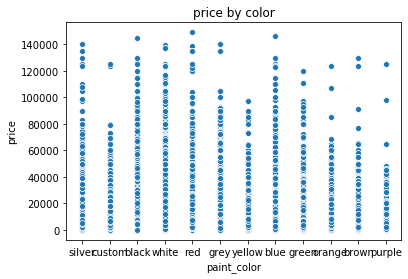

In [36]:
sns.scatterplot(train['paint_color'], train['price'])
plt.title('price by color')

In [37]:
%%time
# Random Forest model

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestRegressor(n_estimators=50)
)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_val)
print('MAE:', mean_absolute_error(y_val, y_pred))
print('R^2:', r2_score(y_val, y_pred))

# lit, already happy about that

Wall time: 0 ns
MAE: 2248.092013163674
R^2: 0.8304594754890315


In [76]:
# XGBoost

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    # SimpleImputer(strategy='median'),  missing values accepted in this
    XGBRegressor(n_estimators=70, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_val)
print('MAE:', mean_absolute_error(y_val, y_pred))
print('R^2:', r2_score(y_val, y_pred))

# Much to tune indeed

[16:34:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 4085.5742847223587
R^2: 0.6513931236503634


In [78]:
# Early stopping, 
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
model = XGBRegressor(
    n_estimators= 500, # up to 1000, depends on early stop
    max_depth = 7,
    learning_rate= 0.5, # try higher learning rate
)

eval_set = [(X_train_encoded, y_train), (X_val_encoded, y_val)]
model.fit(X_train_encoded,y_train,
          eval_set = eval_set,
          eval_metric = 'mae'
          early_stopping_rounds = 50) #stop if score not improved in 50 rounds
    

[16:36:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:10862.7	validation_1-rmse:10734.2
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:8073.71	validation_1-rmse:7974.04
[2]	validation_0-rmse:7020.57	validation_1-rmse:6943.68
[3]	validation_0-rmse:6597.77	validation_1-rmse:6534.67
[4]	validation_0-rmse:6362.85	validation_1-rmse:6327.32
[5]	validation_0-rmse:6215.81	validation_1-rmse:6191.36
[6]	validation_0-rmse:6128.78	validation_1-rmse:6118.94
[7]	validation_0-rmse:6024.35	validation_1-rmse:6036.59
[8]	validation_0-rmse:5937.94	validation_1-rmse:5952.77
[9]	validation_0-rmse:5864.28	validation_1-rmse:5887.44
[10]	validation_0-rmse:5778.42	validation_1-rmse:5839.97
[11]	validation_0-rmse:5732.87	validation_1-rmse:5809.65
[12]	validation_0-rmse:5699.17	validation_1-rmse:57

[140]	validation_0-rmse:3887.11	validation_1-rmse:4804.68
[141]	validation_0-rmse:3875.86	validation_1-rmse:4797.63
[142]	validation_0-rmse:3868.26	validation_1-rmse:4795.03
[143]	validation_0-rmse:3864.65	validation_1-rmse:4789.54
[144]	validation_0-rmse:3855.16	validation_1-rmse:4786.26
[145]	validation_0-rmse:3849.25	validation_1-rmse:4782.93
[146]	validation_0-rmse:3846.91	validation_1-rmse:4782.56
[147]	validation_0-rmse:3844.97	validation_1-rmse:4782.1
[148]	validation_0-rmse:3840.24	validation_1-rmse:4780.14
[149]	validation_0-rmse:3838.29	validation_1-rmse:4779.62
[150]	validation_0-rmse:3830.86	validation_1-rmse:4775.02
[151]	validation_0-rmse:3826.08	validation_1-rmse:4774.14
[152]	validation_0-rmse:3821.06	validation_1-rmse:4768.06
[153]	validation_0-rmse:3813.93	validation_1-rmse:4765.87
[154]	validation_0-rmse:3804.15	validation_1-rmse:4761.48
[155]	validation_0-rmse:3798.82	validation_1-rmse:4761.35
[156]	validation_0-rmse:3794.98	validation_1-rmse:4759.48
[157]	validatio

[282]	validation_0-rmse:3277.45	validation_1-rmse:4621.04
[283]	validation_0-rmse:3273.28	validation_1-rmse:4619.52
[284]	validation_0-rmse:3270.68	validation_1-rmse:4618.58
[285]	validation_0-rmse:3264.3	validation_1-rmse:4616.56
[286]	validation_0-rmse:3260.22	validation_1-rmse:4616.86
[287]	validation_0-rmse:3255	validation_1-rmse:4614.54
[288]	validation_0-rmse:3252.98	validation_1-rmse:4614.3
[289]	validation_0-rmse:3250.38	validation_1-rmse:4613.59
[290]	validation_0-rmse:3248.09	validation_1-rmse:4611.52
[291]	validation_0-rmse:3244.14	validation_1-rmse:4611.24
[292]	validation_0-rmse:3239.39	validation_1-rmse:4610.06
[293]	validation_0-rmse:3233.73	validation_1-rmse:4606.85
[294]	validation_0-rmse:3232.73	validation_1-rmse:4606.84
[295]	validation_0-rmse:3232.07	validation_1-rmse:4606.91
[296]	validation_0-rmse:3228.64	validation_1-rmse:4606.84
[297]	validation_0-rmse:3227.69	validation_1-rmse:4606.87
[298]	validation_0-rmse:3224.53	validation_1-rmse:4605.42
[299]	validation_0-

[424]	validation_0-rmse:2854.12	validation_1-rmse:4520.44
[425]	validation_0-rmse:2851.92	validation_1-rmse:4520.8
[426]	validation_0-rmse:2849.94	validation_1-rmse:4521.25
[427]	validation_0-rmse:2845.34	validation_1-rmse:4518.57
[428]	validation_0-rmse:2841.5	validation_1-rmse:4517.26
[429]	validation_0-rmse:2840.15	validation_1-rmse:4517.36
[430]	validation_0-rmse:2837.42	validation_1-rmse:4516.75
[431]	validation_0-rmse:2834.99	validation_1-rmse:4516.5
[432]	validation_0-rmse:2833.53	validation_1-rmse:4516.69
[433]	validation_0-rmse:2832.53	validation_1-rmse:4516.06
[434]	validation_0-rmse:2830.31	validation_1-rmse:4514.9
[435]	validation_0-rmse:2824.54	validation_1-rmse:4516.92
[436]	validation_0-rmse:2821.61	validation_1-rmse:4514.71
[437]	validation_0-rmse:2817.97	validation_1-rmse:4513.67
[438]	validation_0-rmse:2816.45	validation_1-rmse:4511.9
[439]	validation_0-rmse:2815.17	validation_1-rmse:4512.31
[440]	validation_0-rmse:2813.03	validation_1-rmse:4512.02
[441]	validation_0-

[566]	validation_0-rmse:2561.26	validation_1-rmse:4452.03
[567]	validation_0-rmse:2560.17	validation_1-rmse:4451.8
[568]	validation_0-rmse:2558.03	validation_1-rmse:4452.08
[569]	validation_0-rmse:2556.44	validation_1-rmse:4451.26
[570]	validation_0-rmse:2554.66	validation_1-rmse:4450.04
[571]	validation_0-rmse:2552.84	validation_1-rmse:4450.93
[572]	validation_0-rmse:2551.56	validation_1-rmse:4451.05
[573]	validation_0-rmse:2548.68	validation_1-rmse:4450.27
[574]	validation_0-rmse:2545.67	validation_1-rmse:4449.4
[575]	validation_0-rmse:2544.51	validation_1-rmse:4448.86
[576]	validation_0-rmse:2541.81	validation_1-rmse:4447.87
[577]	validation_0-rmse:2540.63	validation_1-rmse:4447.85
[578]	validation_0-rmse:2538.79	validation_1-rmse:4447.1
[579]	validation_0-rmse:2538.54	validation_1-rmse:4447.33
[580]	validation_0-rmse:2537	validation_1-rmse:4447.02
[581]	validation_0-rmse:2535.32	validation_1-rmse:4446.1
[582]	validation_0-rmse:2532.92	validation_1-rmse:4445.75
[583]	validation_0-rm

[708]	validation_0-rmse:2325.63	validation_1-rmse:4410.5
[709]	validation_0-rmse:2324.77	validation_1-rmse:4410.4
[710]	validation_0-rmse:2323.35	validation_1-rmse:4410.37
[711]	validation_0-rmse:2321.74	validation_1-rmse:4410.42
[712]	validation_0-rmse:2320.3	validation_1-rmse:4410.13
[713]	validation_0-rmse:2318.78	validation_1-rmse:4410.24
[714]	validation_0-rmse:2318.48	validation_1-rmse:4410.47
[715]	validation_0-rmse:2317.07	validation_1-rmse:4410.32
[716]	validation_0-rmse:2315.95	validation_1-rmse:4409.7
[717]	validation_0-rmse:2315.91	validation_1-rmse:4409.67
[718]	validation_0-rmse:2313.6	validation_1-rmse:4408.72
[719]	validation_0-rmse:2309.91	validation_1-rmse:4408.24
[720]	validation_0-rmse:2307.67	validation_1-rmse:4407.08
[721]	validation_0-rmse:2305.93	validation_1-rmse:4406.09
[722]	validation_0-rmse:2305.03	validation_1-rmse:4406
[723]	validation_0-rmse:2302.14	validation_1-rmse:4405.29
[724]	validation_0-rmse:2300.19	validation_1-rmse:4404.91
[725]	validation_0-rms

[851]	validation_0-rmse:2136.74	validation_1-rmse:4379.59
[852]	validation_0-rmse:2135.34	validation_1-rmse:4378.85
[853]	validation_0-rmse:2134.63	validation_1-rmse:4378.52
[854]	validation_0-rmse:2133.55	validation_1-rmse:4378.06
[855]	validation_0-rmse:2132.95	validation_1-rmse:4378.02
[856]	validation_0-rmse:2131.14	validation_1-rmse:4377.69
[857]	validation_0-rmse:2128.91	validation_1-rmse:4377.54
[858]	validation_0-rmse:2127.18	validation_1-rmse:4377.25
[859]	validation_0-rmse:2125.96	validation_1-rmse:4376.94
[860]	validation_0-rmse:2125.67	validation_1-rmse:4376.92
[861]	validation_0-rmse:2125.31	validation_1-rmse:4376.85
[862]	validation_0-rmse:2123.93	validation_1-rmse:4376.84
[863]	validation_0-rmse:2123.19	validation_1-rmse:4376.84
[864]	validation_0-rmse:2122.19	validation_1-rmse:4376.44
[865]	validation_0-rmse:2120.32	validation_1-rmse:4376.42
[866]	validation_0-rmse:2119.74	validation_1-rmse:4376.59
[867]	validation_0-rmse:2118.83	validation_1-rmse:4376.23
[868]	validati

[993]	validation_0-rmse:1987.22	validation_1-rmse:4363.25
[994]	validation_0-rmse:1986.3	validation_1-rmse:4363.04
[995]	validation_0-rmse:1985.53	validation_1-rmse:4362.99
[996]	validation_0-rmse:1984.02	validation_1-rmse:4362.97
[997]	validation_0-rmse:1983.21	validation_1-rmse:4362.63
[998]	validation_0-rmse:1982.52	validation_1-rmse:4362.49
[999]	validation_0-rmse:1982.15	validation_1-rmse:4362.43


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [80]:
# Early stopping, 
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
model = XGBRegressor(
    n_estimators= 500, # up to 1000, depends on early stop
    max_depth = 7,
    learning_rate= 0.5, # try higher learning rate
)

eval_set = [(X_train_encoded, y_train), (X_val_encoded, y_val)]
model.fit(X_train_encoded,y_train,
          eval_set = eval_set,
          eval_metric = 'mae',
          early_stopping_rounds = 50)
# Random forest still better, will have to play with it

[16:53:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:7381.13	validation_1-mae:7319.4
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 50 rounds.
[1]	validation_0-mae:4988.48	validation_1-mae:4971.03
[2]	validation_0-mae:4195.16	validation_1-mae:4197.81
[3]	validation_0-mae:3923.63	validation_1-mae:3937.89
[4]	validation_0-mae:3811.74	validation_1-mae:3832.81
[5]	validation_0-mae:3730.88	validation_1-mae:3749.57
[6]	validation_0-mae:3683.74	validation_1-mae:3707.76
[7]	validation_0-mae:3625.57	validation_1-mae:3656.22
[8]	validation_0-mae:3567.49	validation_1-mae:3601.87
[9]	validation_0-mae:3530.55	validation_1-mae:3566.74
[10]	validation_0-mae:3464.69	validation_1-mae:3525.22
[11]	validation_0-mae:3442.18	validation_1-mae:3508.15
[12]	validation_0-mae:3416.68	validation_1-mae:3490.54
[13]	validation_0-mae:3

[144]	validation_0-mae:2432.46	validation_1-mae:2803.13
[145]	validation_0-mae:2427.67	validation_1-mae:2799.83
[146]	validation_0-mae:2425.76	validation_1-mae:2798.94
[147]	validation_0-mae:2424.25	validation_1-mae:2798.54
[148]	validation_0-mae:2421.37	validation_1-mae:2796.74
[149]	validation_0-mae:2420.47	validation_1-mae:2796.15
[150]	validation_0-mae:2417.03	validation_1-mae:2793.99
[151]	validation_0-mae:2415.83	validation_1-mae:2794.21
[152]	validation_0-mae:2412.13	validation_1-mae:2789.86
[153]	validation_0-mae:2407.75	validation_1-mae:2787.93
[154]	validation_0-mae:2402.06	validation_1-mae:2784.47
[155]	validation_0-mae:2399.73	validation_1-mae:2783.99
[156]	validation_0-mae:2397.33	validation_1-mae:2782.76
[157]	validation_0-mae:2394.92	validation_1-mae:2781.96
[158]	validation_0-mae:2394.13	validation_1-mae:2782.02
[159]	validation_0-mae:2390.67	validation_1-mae:2779.64
[160]	validation_0-mae:2388.25	validation_1-mae:2779.04
[161]	validation_0-mae:2385.32	validation_1-mae:

[291]	validation_0-mae:2092.08	validation_1-mae:2655
[292]	validation_0-mae:2090.34	validation_1-mae:2654.05
[293]	validation_0-mae:2086.97	validation_1-mae:2651.14
[294]	validation_0-mae:2086.1	validation_1-mae:2651.16
[295]	validation_0-mae:2085.4	validation_1-mae:2651.09
[296]	validation_0-mae:2083.53	validation_1-mae:2651
[297]	validation_0-mae:2082.74	validation_1-mae:2650.94
[298]	validation_0-mae:2080.52	validation_1-mae:2649.9
[299]	validation_0-mae:2078.92	validation_1-mae:2648.76
[300]	validation_0-mae:2076.27	validation_1-mae:2647.4
[301]	validation_0-mae:2074.2	validation_1-mae:2646.36
[302]	validation_0-mae:2072.63	validation_1-mae:2645.69
[303]	validation_0-mae:2071.39	validation_1-mae:2644.74
[304]	validation_0-mae:2069.6	validation_1-mae:2643.67
[305]	validation_0-mae:2068.66	validation_1-mae:2644.06
[306]	validation_0-mae:2067.43	validation_1-mae:2644.17
[307]	validation_0-mae:2063.38	validation_1-mae:2641.1
[308]	validation_0-mae:2060.92	validation_1-mae:2639.13
[309]

[438]	validation_0-mae:1848.94	validation_1-mae:2545.78
[439]	validation_0-mae:1847.81	validation_1-mae:2546.35
[440]	validation_0-mae:1846.45	validation_1-mae:2545.52
[441]	validation_0-mae:1845.5	validation_1-mae:2544.85
[442]	validation_0-mae:1845.09	validation_1-mae:2544.5
[443]	validation_0-mae:1843.82	validation_1-mae:2543.91
[444]	validation_0-mae:1842.41	validation_1-mae:2543.28
[445]	validation_0-mae:1841.53	validation_1-mae:2542.95
[446]	validation_0-mae:1840.28	validation_1-mae:2542.73
[447]	validation_0-mae:1839.24	validation_1-mae:2541.98
[448]	validation_0-mae:1837.83	validation_1-mae:2541.8
[449]	validation_0-mae:1835.98	validation_1-mae:2540.62
[450]	validation_0-mae:1835.39	validation_1-mae:2540.66
[451]	validation_0-mae:1833.26	validation_1-mae:2539.68
[452]	validation_0-mae:1832.18	validation_1-mae:2539.08
[453]	validation_0-mae:1830.54	validation_1-mae:2538.83
[454]	validation_0-mae:1829.63	validation_1-mae:2538.38
[455]	validation_0-mae:1828.72	validation_1-mae:253

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# Model Interpretation
# You will use your portfolio project dataset for all assignments this sprint.

# Assignment
# Complete these tasks for your project, and document your work.

# x Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
# x Make at least 1 partial dependence plot to explain your model.
# x Make at least 1 Shapley force plot to explain an individual prediction.
# x Share at least 1 visualization (of any type) on Slack!
# Stretch Goals
# Partial Dependence Plots
#  Make multiple PDPs with 1 feature in isolation.
# x Make multiple PDPs with 2 features in interaction.
#  Use Plotly to make a 3D PDP.

In [58]:
# Clean up for pdp
encoder = ce.OrdinalEncoder()
val_encoded = encoder.fit_transform(val)
imputer = SimpleImputer(strategy='median')
val_imputed = imputer.fit_transform(val_encoded)
df_val_imputed = pd.DataFrame(data= val_imputed, columns=val.columns)
X_val_imputed = df_val_imputed[features]
rf = RandomForestRegressor()
model = rf.fit(X_val_imputed, y_val)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2264015b488>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x226013b9b48>})

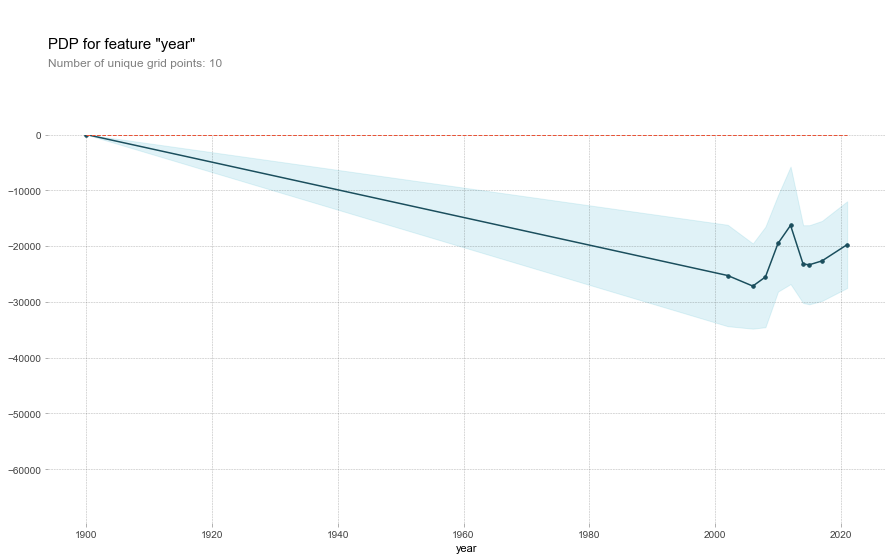

In [60]:
# x Make at least 1 partial dependence plot to explain your model.

feature = 'year'
isolated = pdp_isolate(
    model = pipeline,
    dataset= X_val_imputed,
    model_features= X_val_imputed.columns,
    feature = feature
)
pdp_plot(isolated, feature_name= feature)

# neat. You can kinda see what cars people put up for sale have value.

In [71]:
# let's look at that old year
val.sort_values(by='year').head(6)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,transmission,vin,drive,size,type,paint_color,image_url,state,lat,long
375986,7043607692,long island,1.0,1900.0,NaN,ANY,good,other,other,158100.0,...,other,1HTSCABK71H400048,rwd,full-size,truck,custom,https://images.craigslist.org/00W0W_gOZsXfeDMf...,ny,40.8,-73.3
493254,7042482733,galveston,100.0,1900.0,NaN,s,NaN,NaN,other,nan,...,other,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00W0W_6LHbhF60va...,tx,29.4,-95.0
135695,7049705658,denver,15800.0,1900.0,jeep,wrangler unlimited sahara,excellent,6 cylinders,gas,126000.0,...,automatic,NaN,4wd,NaN,NaN,orange,https://images.craigslist.org/00B0B_lGWjhvAa99...,co,39.7,-105.1
439625,7049756216,lehigh valley,3.0,1903.0,NaN,All mAkes,NaN,NaN,gas,nan,...,other,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00d0d_kgloDtIqUF...,pa,40.8,-75.6
270222,7048696066,south coast,7000.0,1911.0,ford,model t,salvage,4 cylinders,gas,nan,...,manual,NaN,rwd,NaN,NaN,red,https://images.craigslist.org/00s0s_1ypW227JM2...,ma,41.9,-71.1
424782,7049387969,medford-ashland,9495.0,1922.0,ford,model t runabout,NaN,NaN,gas,nan,...,other,CA393011,NaN,NaN,NaN,NaN,https://images.craigslist.org/00W0W_llErlIVbi4...,or,42.4,-123.3


(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x25f21fe6788>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x25f21d9c2c8>})

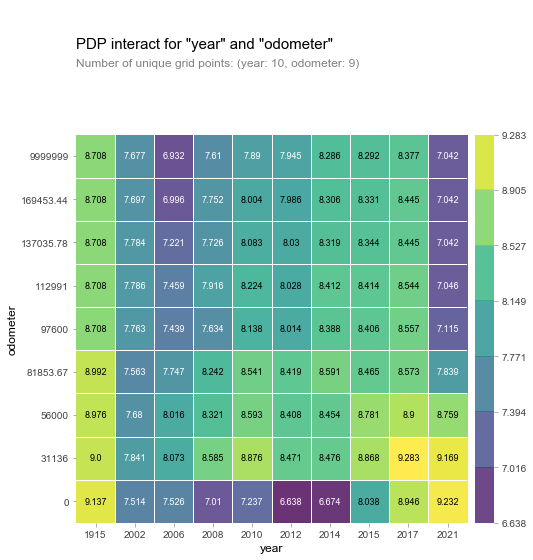

In [77]:
# STRETCH
#  Make multiple PDPs with 2 features in interaction.
feature= ['year', 'odometer']

interaction = pdp_interact(
    model = pipeline,
    dataset = X_val_imputed,
    model_features= X_val_imputed.columns,
    features= feature
)
pdp_interact_plot(interaction, plot_type='grid', feature_names=feature)
# Kinda meaningless without the drive dictionary

In [64]:
# encoder.get_feature_names 
# Didn't quite get this to work to show drive

In [62]:
#  Make at least 1 Shapley force plot to explain an individual prediction.
row = X_val_imputed.iloc[[5]]
y_val.iloc[[5]], model.predict(row)

(412645   2200.0
 Name: price, dtype: float64,
 array([2549.72]))

In [63]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value= explainer.expected_value,
    shap_values = shap_values,
    features= row

)
